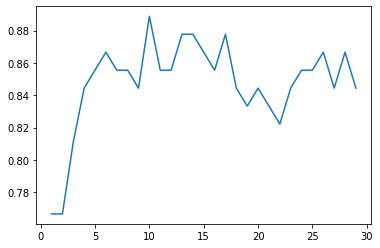

In [4]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier class
from sklearn.metrics import accuracy_score # Importing Accuracy Score metric for evaluating our model


data = pd.read_csv('titanic_train.csv', index_col='PassengerId') # Reading Dataframe

data = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1) # Dropping columns we do not need for prediction
data['Age'] = data['Age'].fillna(data['Age'].mean()) # Filling out missing values in "Age" column
mapping = {'male': 0, 'female': 1} 
data = data.replace({'Sex': mapping}) # Replacing values in "Sex" column with 0 and 1.

X_train = data.drop(['Survived'], axis=1)[:800]  #
y_train = data[['Survived']][:800]               #
                                                 # Creating train and test dataset     
X_test = data.drop(['Survived'], axis=1)[801:]   #
y_test = data.Survived[801:]                     #

MAX_DEPTH = list(range(1, 30))
ACCURACY = []

for max_depth in range(1, 30): # Iterating through MAX_DEPTH to find best model
    
    clf = DecisionTreeClassifier(criterion='entropy', max_depth = max_depth) # Creating DecisionTreeClassifier
    clf.fit(X_train, y_train) # Training our model
    
    y_pred = clf.predict(X_test) # Predicting labels for out X test
    
    ACCURACY.append(accuracy_score(y_test, y_pred)) # Appending new accuracy score to ACCURACY list
    
import matplotlib.pyplot as plt # Importing pyplot for plotting

plt.plot(MAX_DEPTH, ACCURACY) # Plotting out accuracy score vs max depth
plt.show() # Showing figure